In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [200]:
# Import data from Excel file from sheet name as latent variables
data = pd.read_excel('variables.xlsx', sheet_name='Latent variables')
# Remove the first column
data = data.iloc[:, 1:]
data.head()

,Visibility,Agility,Adaptability,Analytics driven culture,Human resource expertise,Managerial competency,Technical capability,Firm performance
0,-0.548,0.768,-0.101,-0.230,0.779,-0.561,0.028,-1.057
1,-0.729,-1.617,-1.014,-1.148,-1.388,-0.140,-1.088,-1.345
2,-1.235,-0.463,-0.101,-0.629,-1.058,-0.561,-0.943,-1.057
3,-1.054,-0.197,-0.101,-0.689,-0.408,-1.128,-1.518,-1.042
4,-1.088,0.469,0.546,-0.629,0.047,-0.561,0.028,0.401


In [201]:

X = data[['Analytics driven culture', 'Human resource expertise', "Managerial competency", "Technical capability",
          'Visibility', 'Agility', "Adaptability"]]  # Replace with your subdimensions
y = data['Firm performance']

# split the data into train and test data with 80% training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a dictionaries of list of models to evaluate performance
models = { 
          'SVR' : SVR(),
          'DecisionTreeRegressor' : DecisionTreeRegressor(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'KNeighborsRegressor' : KNeighborsRegressor(),
          'GradientBoostingRegressor' : GradientBoostingRegressor(),
          'XGBRegressor' : XGBRegressor()          
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

      # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_squared_error(y_test, y_pred)
    model_scores.append((name, metric))
    
    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')
    #selecting the best model from all above models with evaluation metrics sorting method
sorted_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in sorted_models:
    print('mean squared error', f"{model[0]} is {model[1]: .2f}") 

SVR MSE:  0.7952828323340013
SVR R2:  0.14731938486379992
SVR MAE:  0.7129013908133685


DecisionTreeRegressor MSE:  1.401386595238095
DecisionTreeRegressor R2:  -0.5025285791274285
DecisionTreeRegressor MAE:  0.9714047619047619


RandomForestRegressor MSE:  0.7862976190714286
RandomForestRegressor R2:  0.15695308605834912
RandomForestRegressor MAE:  0.7217690476190477


KNeighborsRegressor MSE:  0.907288167142857
KNeighborsRegressor R2:  0.027230312271772528
KNeighborsRegressor MAE:  0.7614880952380952


GradientBoostingRegressor MSE:  0.7966900285554194
GradientBoostingRegressor R2:  0.14581062736154804
GradientBoostingRegressor MAE:  0.7317534968609195


XGBRegressor MSE:  0.9861142459414548
XGBRegressor R2:  -0.057284864752110254
XGBRegressor MAE:  0.7968903898945788


mean squared error RandomForestRegressor is  0.79
mean squared error SVR is  0.80
mean squared error GradientBoostingRegressor is  0.80
mean squared error KNeighborsRegressor is  0.91
mean squared error XGBRegressor 

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error (MSE): 0.7964791792349937
R-squared (R²): 0.14603669426621646


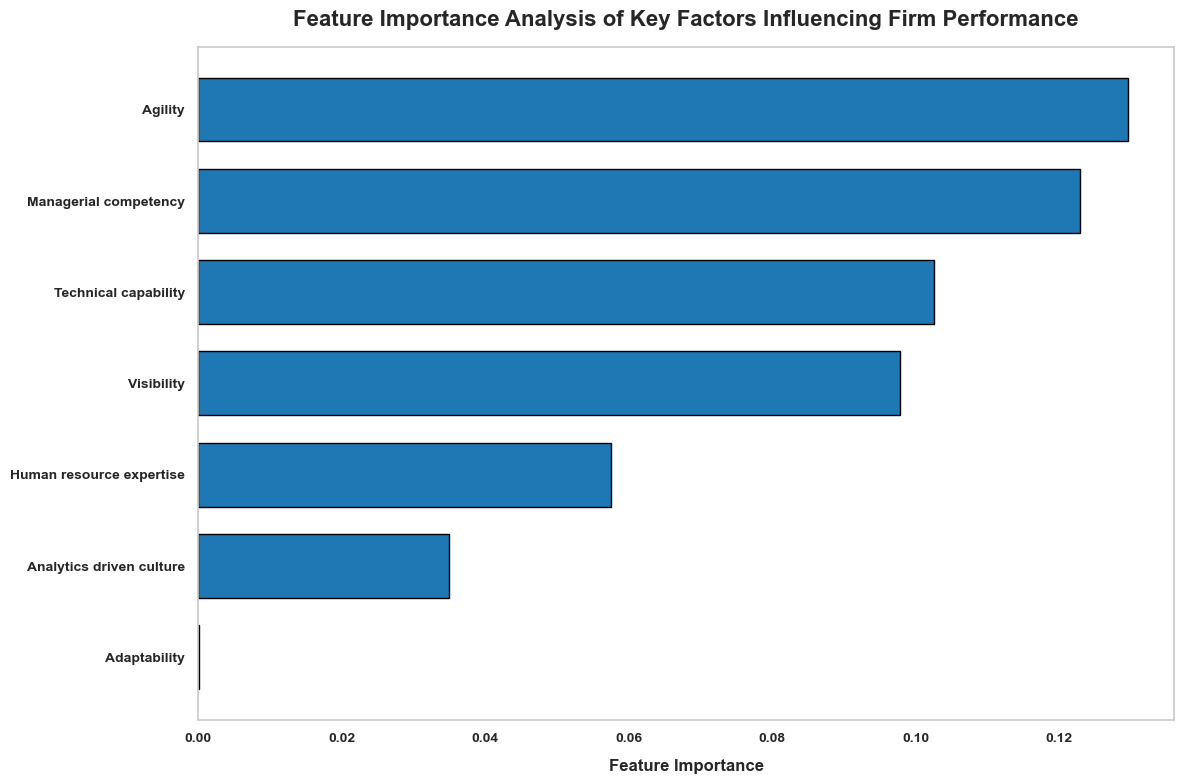

In [203]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('variables.xlsx', sheet_name='Latent variables')
data = data.iloc[:, 1:]

# Define features and target variable
X = data[['Analytics driven culture', 'Human resource expertise', "Managerial competency", "Technical capability",
          'Visibility', 'Agility', "Adaptability"]]
y = data['Firm performance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model
svr = SVR()

# Set the hyperparameter grid for tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only for 'poly' kernel
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Extract feature importance using the coefficients for linear kernel
if grid_search.best_params_['kernel'] == 'linear':
    importance = np.abs(best_model.coef_).flatten()
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='#1f77b4', edgecolor='black', height=0.7)
    plt.title("Feature Importance Analysis of Key Factors Influencing Firm Performance", fontsize=16, loc="center", weight='bold', pad=15)
    plt.xlabel("Feature Importance", fontsize=12, weight='bold', labelpad=10)
    plt.ylabel("")
    plt.xticks(fontsize=10, weight='bold', rotation=0)
    plt.yticks(fontsize=10, weight='bold')
    plt.gca().invert_yaxis()  # Show the most important feature at the top
    plt.tight_layout()
    plt.grid(False)
    
    plt.savefig('feature_importance_svr.jpg', dpi=300)
    plt.show()
else:
    print("Feature importance cannot be calculated for non-linear kernels.")

